# Parkinson's Disease Detection

This program detects if an individual has Parkinson's disease

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
#Checking if the dataset has any null values
df.isnull().values.any()

False

In [6]:
df.shape

(195, 24)

In [7]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [8]:
percent_has_disease = 147/(147 + 48)*100
percent_dont_have_disease = 48/(147+48)*100

print('If I guess the individual did not have Parkinsons disease, I am correct', percent_dont_have_disease, '% of the time')
print('If I guess the individual has Parkinsons disease I am correct', percent_has_disease, '% of the time')



If I guess the individual did not have Parkinsons disease, I am correct 24.615384615384617 % of the time
If I guess the individual has Parkinsons disease I am correct 75.38461538461539 % of the time


D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

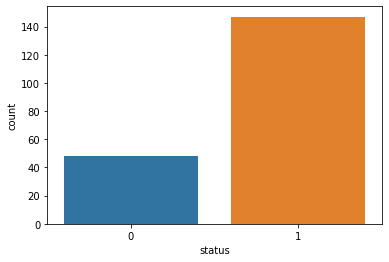

In [9]:
#VISUALIZING
sns.countplot(df['status'])


In [10]:
#datatypes
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [11]:
#Feature Dataset
X = df.drop(['name'],1)
X = np.array(X.drop(['status'],1))
#Target Dataset
y = np.array(df['status'])

In [17]:
#Now we shall train the dataset. We use the 80/20 split.
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [15]:
#Converting Feature data values to 0 and 1
sc = MinMaxScaler(feature_range=(0,1))
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
#Creating XGradientBoost Classifier
model = XGBClassifier().fit(x_train, y_train)

D:\ANACONDA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [19]:
#Predictions of the Model
predictions = model.predict(x_test)
predictions

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [20]:
y_test

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [21]:
#Let's check the accuracy of the model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.91      1.00      0.95        30

    accuracy                           0.92        39
   macro avg       0.95      0.83      0.88        39
weighted avg       0.93      0.92      0.92        39

